# "50 startups."

### _"Predict which companies to invest for maximizing profit" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [239]:
# import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

* ### Load Data

In [240]:
# read data from '.csv' files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# identify target
target = train['Profit']

## Part 2: Exploratory Data Analysis.

* ### Info

In [241]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [242]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [243]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [244]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable

In [245]:
# target variable
train['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

C:\Users\dmitr\AppData\Local\Temp\ipykernel_13364\3808678246.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Profit'], color='b')


<Axes: xlabel='Profit', ylabel='Density'>

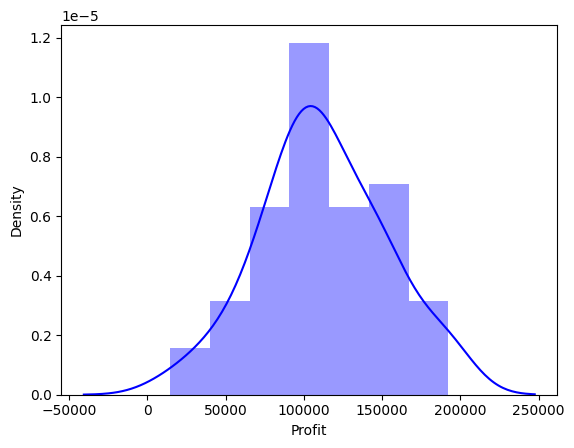

In [246]:
# visualisation of 'Profit' distribution
sns.distplot(train['Profit'], color='b')

In [247]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')
test.head(5)

,R&D Spend,Administration,Marketing Spend,State,Category
ID,,,,,
0,165349.20,136897.80,471784.10,New York,Industrials
1,162597.70,151377.59,443898.53,California,Technology
2,153441.51,101145.55,407934.54,Florida,Healthcare
3,144372.41,118671.85,383199.62,New York,Financials
4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [248]:
# check for Numerical and Categorical features in Train
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
print('Quantity of numerical features: ', len(numerical_feats_train))
print()
print(train[numerical_feats_train].columns)
print()
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print('Quantity of categorical features: ', len(categorical_feats_train))
print()
print(train[categorical_feats_train].columns)
print()

Quantity of numerical features:  4

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Quantity of categorical features:  2

Index(['State', 'Category'], dtype='object')



* ### Missing values

#### List of data features with missing values

In [249]:
# check the Train features with missing values 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print(f'There are {str(len(nan_columns))} columns with NAN values for 50 rows')
nan_columns

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

There are 3 columns with NAN values for 50 rows


['R&D Spend', 'Marketing Spend', 'Category']

In [250]:
# check the Test features with missing values
nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print()
print(f'There are {str(len(nan_columns))} columns with NAN values for 50 rows')
nan_columns

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

There are 3 columns with NAN values for 50 rows


['R&D Spend', 'Administration', 'State']

#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'mean';
* 'Administration': Numerical - replacement of NAN by 'mean';
* 'Marketing Spend': Numerical - replacement of NAN by 'mean';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [251]:
# Numerical NAN columns to fill in Train and Test datasets
nan_columns_fill = [
    'R&D Spend', 
    'Marketing Spend',
    'Administration'
]

# replace 'NAN' with 'mean' in these columns
for col in nan_columns_fill:
    train[col].fillna(train[col].mean(), inplace = True)
    test[col].fillna(test[col].mean(), inplace = True)

# Categorical NAN columns to fill in Train and Test datasets
na_columns_fill = [
    'State', 
    'Category'
]

# replace 'NAN' with 'None' in these columns
for col in na_columns_fill:
    train[col].fillna('None', inplace = True)
    test[col].fillna('None', inplace = True)

In [252]:
# check is there any mising values left in Train
train.isnull().sum().sum()

0

In [253]:
# check is there any mising values left in Test
test.isnull().sum().sum()

0

#### Visualisation  of Numerical features (regplot)

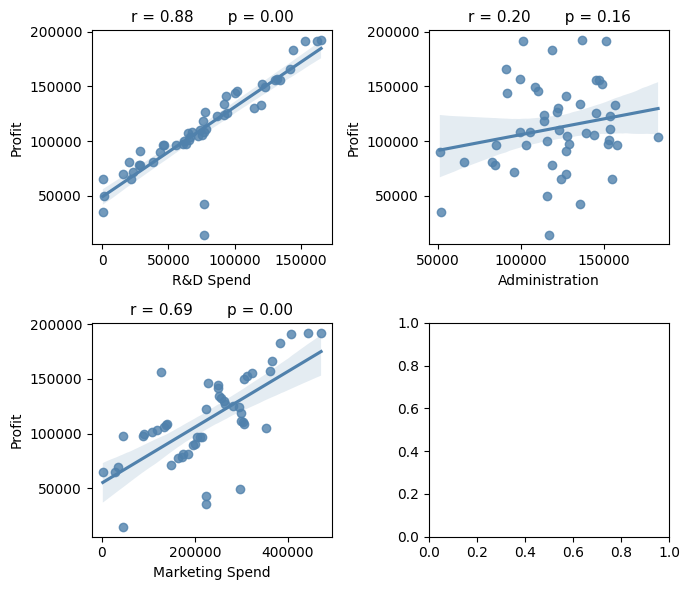

In [254]:
# numerical features visualisation
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3))

num_feats = list(numerical_feats_train)
not_plot = ['ID', 'Profit']
plot_num_feats = [c for c in list(numerical_feats_train) if c not in not_plot]

for r in range(0,nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            
            sns.regplot(x = train[plot_num_feats[i]], y = train['Profit'], ax = axs[r][c], color = '#5081ac')
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])

            str_title = 'r = ' + '{0:.2f}'.format(stp[0]) + '       ' 'p = ' + '{0:.2f}'.format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)

plt.tight_layout()
plt.show()
        

<Axes: xlabel='State', ylabel='Profit'>

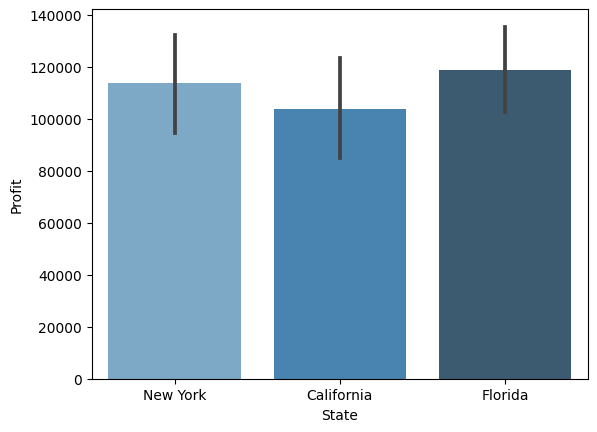

In [255]:
# categorical features visualisation
# 'Profit' split in 'State' level
sns.barplot(x = 'State', y = 'Profit', data = train, palette = 'Blues_d')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

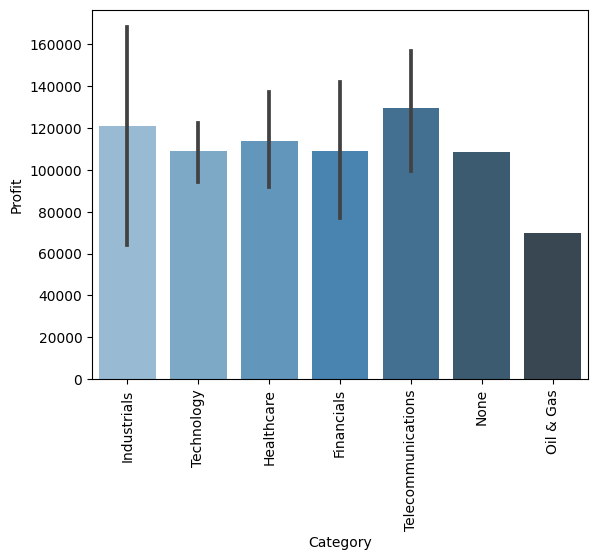

In [256]:
# categorical features visualisation
# 'Profit' split in 'Category' level
sns.barplot(x = 'Category', y = 'Profit', data = train, palette = 'Blues_d')
plt.xticks(rotation=90)

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [257]:
train.head()


,R&D Spend,Administration,Marketing Spend,State,Category,Profit
ID,,,,,,
0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [258]:
# One-Hot Encoding Train dataset
train = pd.get_dummies(train, columns=['State', 'Category'], dtype=int)

# Drop target variable 
train = train.drop(columns=['Profit'])


In [259]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0,0


In [260]:
# Train data shape
train.shape

(50, 13)

In [261]:
# One Hot-Encoding Test dataset
test = pd.get_dummies(test, columns=['State', 'Category'], dtype=int)

In [262]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,0,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,0,1,0,0,0


In [263]:
# Test data shape
test.shape

(50, 13)

In [264]:
# Drop unnecessary variables 
train = train.drop(columns=['Category_None'])
test = test.drop(columns=['State_None'])

* ### StandardScaler

In [265]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc_train = sc.fit_transform(train)
#sc_test = sc.transform(test)

In [266]:
#sc_train = pd.DataFrame(sc_train)
#sc_train.head()

In [267]:
#sc_test = pd.DataFrame(sc_test)
#sc_test.head()

* ### Creating datasets for ML part

In [268]:
# set 'X' for features of scaled Train dataset 'sc_train'
#X = sc_train

# set 'y' for the target 'Profit'
#y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
#X_Test = sc_test

In [269]:
# set 'X' for features of scaled Train dataset 'train'
X = train

# set 'y' for the target 'Profit'
y = target

# 'X_Test' for features of scaled Test dataset 'test'
X_Test = test

* ### 'Train\Test' split

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [272]:
X_train.shape

(35, 12)

In [273]:
X_test.shape

(15, 12)

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [274]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train,y_train)

# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([ 98805.75002446, 120582.06246646, 137745.21283983,  79034.09403155,
       188946.03574103, 118622.88055624,  72254.79066   ,  67164.69815167,
       128666.63674181, 142782.3087556 ,  91593.10175464,  80612.80343627,
       101576.44119369, 101521.36354767, 125192.09524706])

In [275]:
# Model R2 score
LRscore = LR.score(X_test, y_test)
LRscore

0.7896875328347083

In [276]:
# Model Metrics
r2 = r2_score(y_test, LR_pred)  # Коэффициент детерминации (R2 Score)
mae = mean_absolute_error(y_test, LR_pred)  # Средняя абсолютная ошибка (MAE)
mse = mean_squared_error(y_test, LR_pred)  # Среднеквадратичная ошибка (MSE)
rmse = np.sqrt(mse)  # Корень из среднеквадратичной ошибки (RMSE)
msle = mean_squared_log_error(y_test, LR_pred)  # Среднеквадратичная логарифмическая ошибка (MSLE)
rmsle = np.sqrt(msle)  # Корень из среднеквадратичной логарифмической ошибки (RMSLE)

# Создаем DataFrame
LRMetrics = pd.DataFrame({
    'Metric': ['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'],
    'Value': ['Linear Regression', r2, mae, mse, rmse, msle, rmsle]
})
LRMetrics

,Metric,Value
0,Model,Linear Regression
1,R2 Score,0.789688
2,MAE,11029.42834
3,MSE,203003535.159333
4,RMSE,14247.930908
5,MSLE,0.019417
6,RMSLE,0.139346


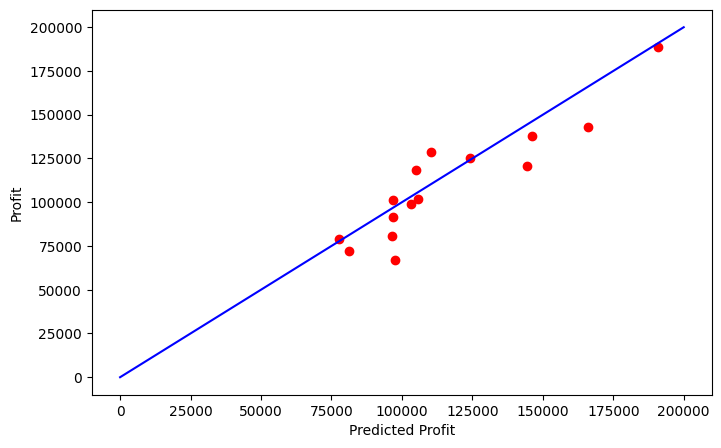

In [277]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred, 'ro')
pl.plot([0,200000], [0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [278]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1

array([173426.18101741, 189136.03555658, 188946.03574103, 172036.55217563,
       142782.3087556 , 167404.74613989, 149507.66869685, 157587.3922617 ,
       161999.46205811, 156553.51538032, 139352.35038226, 120582.06246646,
       123602.43674921, 100870.47894581, 145214.20798084, 136337.33249719,
       115045.39296363, 128341.08289509, 125192.09524706, 120516.13649408,
       112463.0053601 , 124542.37179041, 128666.63674181, 109208.23838339,
       109268.13666644, 103605.55516326, 101576.44119369, 118622.88055624,
        97349.61154671,  96055.59746149,  97834.88695235,  67164.69815167,
        79791.40130303,  91593.10175464, 101521.36354767,  80612.80343627,
        75658.16264028,  81945.35628307,  72254.79066   ,  74848.96219321,
        87297.82122284,  79034.09403155,  73120.64657189,  69758.98      ,
        54155.9502917 ,  48109.28237089,  70180.21341563, 102747.18569225,
        34091.10390916,  66953.92003678])

In [279]:
# Model Metrics
r2 = r2_score(y, LR_pred1)  # Коэффициент детерминации (R2 Score)
mae = mean_absolute_error(y, LR_pred1)  # Средняя абсолютная ошибка (MAE)
mse = mean_squared_error(y, LR_pred1)  # Среднеквадратичная ошибка (MSE)
rmse = np.sqrt(mse)  # Корень из среднеквадратичной ошибки (RMSE)
msle = mean_squared_log_error(y, LR_pred1)  # Среднеквадратичная логарифмическая ошибка (MSLE)
rmsle = np.sqrt(msle)  # Корень из среднеквадратичной логарифмической ошибки (RMSLE)

# Создаем DataFrame
LRMetrics1 = pd.DataFrame({
    'Metric': ['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'],
    'Value': ['Linear Regression', r2, mae, mse, rmse, msle, rmsle]
})
LRMetrics1

,Metric,Value
0,Model,Linear Regression
1,R2 Score,0.826878
2,MAE,11442.48225
3,MSE,275627109.231528
4,RMSE,16602.021239
5,MSLE,0.077744
6,RMSLE,0.278826


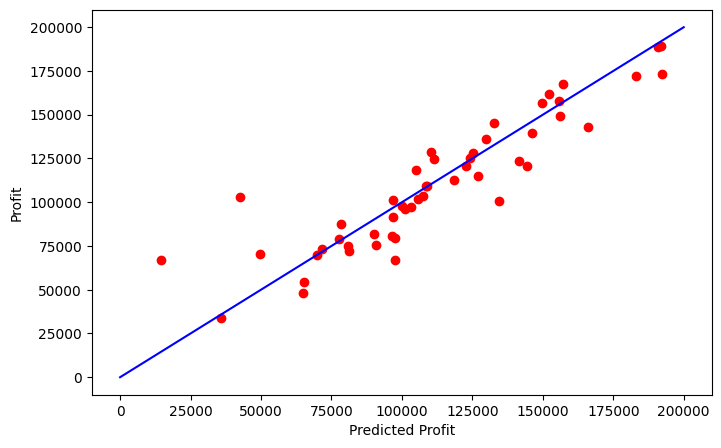

In [280]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred1, 'ro')
pl.plot([0,200000], [0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [281]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({'Actual Profit':y, 'LR Predicted Profit': LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192261.830000,173426.181017
1,191792.060000,189136.035557
2,191050.390000,188946.035741
3,182901.990000,172036.552176
4,166187.940000,142782.308756
5,156991.120000,167404.746140
6,156122.510000,149507.668697
7,155752.600000,157587.392262
8,152211.770000,161999.462058
9,149759.960000,156553.515380


* #### Gradient Boosting Regressor

In [282]:
# Gradient Boosting Regressor model
GB = GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train, y_train)

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore = GB.score(X_test, y_test)

In [283]:
# Model Metrics
r2 = r2_score(y_test, GB_pred)  # Коэффициент детерминации (R2 Score)
mae = mean_absolute_error(y_test, GB_pred)  # Средняя абсолютная ошибка (MAE)
mse = mean_squared_error(y_test, GB_pred)  # Среднеквадратичная ошибка (MSE)
rmse = np.sqrt(mse)  # Корень из среднеквадратичной ошибки (RMSE)
msle = mean_squared_log_error(y_test, GB_pred)  # Среднеквадратичная логарифмическая ошибка (MSLE)
rmsle = np.sqrt(msle)  # Корень из среднеквадратичной логарифмической ошибки (RMSLE)

# Создаем DataFrame
GBMetrics = pd.DataFrame({
    'Metric': ['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'],
    'Value': ['Gradient Boosting Regressor', r2, mae, mse, rmse, msle, rmsle]
})
GBMetrics

,Metric,Value
0,Model,Gradient Boosting Regressor
1,R2 Score,0.871975
2,MAE,8794.067752
3,MSE,123575498.548938
4,RMSE,11116.451707
5,MSLE,0.015324
6,RMSLE,0.123789


In [284]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)
GB_pred1

array([191867.62412877, 191631.05238384, 182312.33020149, 182851.07019825,
       170184.03117736, 156991.18174795, 156065.18337778, 155657.3156548 ,
       152090.77310553, 150395.82943541, 135833.10096525, 135798.71119382,
       140540.49969677, 134579.63175502, 132595.76221416, 130294.55614165,
       125793.92655291, 126209.72285288, 135659.5660787 , 122882.32584237,
       117835.38481012, 111969.75024449, 113088.74948464, 110496.69885551,
       108543.71533736, 106782.00926405, 100703.62829827, 115017.2936342 ,
        97761.05228023, 100662.1422931 , 100154.39192354,  67319.94705424,
        97320.64222056,  89993.81533634,  95465.26657434,  89806.79103934,
        90445.08322914,  90910.6120068 ,  65985.21951611,  81197.13795016,
        87371.73375666,  83333.46208317,  71349.24006266,  69736.52264338,
        65210.21519883,  65096.65246463,  49789.84064265,  54095.08217819,
        48882.78764903,  14431.4364362 ])

In [285]:
# Model Metrics
r2 = r2_score(y, GB_pred1)  # Коэффициент детерминации (R2 Score)
mae = mean_absolute_error(y, GB_pred1)  # Средняя абсолютная ошибка (MAE)
mse = mean_squared_error(y, GB_pred1)  # Среднеквадратичная ошибка (MSE)
rmse = np.sqrt(mse)  # Корень из среднеквадратичной ошибки (RMSE)
msle = mean_squared_log_error(y, GB_pred1)  # Среднеквадратичная логарифмическая ошибка (MSLE)
rmsle = np.sqrt(msle)  # Корень из среднеквадратичной логарифмической ошибки (RMSLE)

# Создаем DataFrame
GBMetrics1 = pd.DataFrame({
    'Metric': ['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE', 'MSLE', 'RMSLE'],
    'Value': ['Gradient Boosting Regressor', r2, mae, mse, rmse, msle, rmsle]
})
GBMetrics1

,Metric,Value
0,Model,Gradient Boosting Regressor
1,R2 Score,0.972002
2,MAE,3554.613741
3,MSE,44574897.377586
4,RMSE,6676.443468
5,MSLE,0.007986
6,RMSLE,0.089364


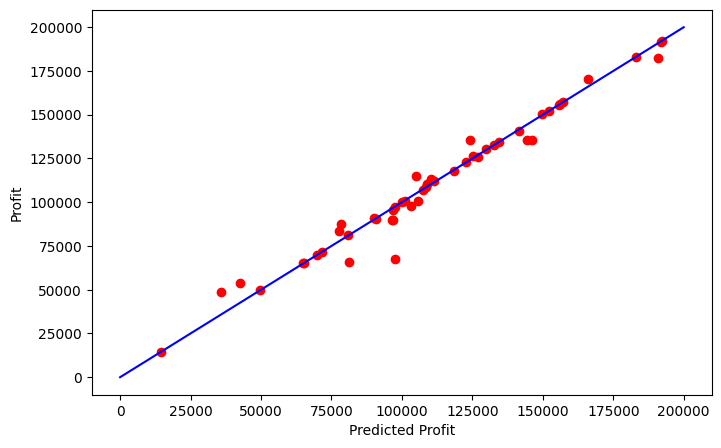

In [286]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, GB_pred1, 'ro')
pl.plot([0,200000], [0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [287]:
actualvspredicted = pd.DataFrame({'Actual Profit':y, 'LR Predicted Profit': LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192261.830000,173426.181017
1,191792.060000,189136.035557
2,191050.390000,188946.035741
3,182901.990000,172036.552176
4,166187.940000,142782.308756
5,156991.120000,167404.746140
6,156122.510000,149507.668697
7,155752.600000,157587.392262
8,152211.770000,161999.462058
9,149759.960000,156553.515380


### Model comparison

In [288]:
# score comparison of models
TrainingResult = LRMetrics1
TrainingResult['ValueGB'] = GBMetrics1['Value']
TrainingResult

,Metric,Value,ValueGB
0,Model,Linear Regression,Gradient Boosting Regressor
1,R2 Score,0.826878,0.972002
2,MAE,11442.48225,3554.613741
3,MSE,275627109.231528,44574897.377586
4,RMSE,16602.021239,6676.443468
5,MSLE,0.077744,0.007986
6,RMSLE,0.278826,0.089364


In [289]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({'Actual Profit':y, 'LR Predicted Profit': LR_pred1, 'GB Predicted Profit': GB_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
0,192261.830000,173426.181017,191867.624129
1,191792.060000,189136.035557,191631.052384
2,191050.390000,188946.035741,182312.330201
3,182901.990000,172036.552176,182851.070198
4,166187.940000,142782.308756,170184.031177
5,156991.120000,167404.746140,156991.181748
6,156122.510000,149507.668697,156065.183378
7,155752.600000,157587.392262,155657.315655
8,152211.770000,161999.462058,152090.773106
9,149759.960000,156553.515380,150395.829435


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

##  Conclusion.

In [290]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)